# Extração de dados

In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\55839\AppData\Local\Temp\ipykernel_15460\680490118.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
dados_conexao = (
    "Driver={SQL Server};"
    "Server=DESKTOP-GIUN6BQ;"
    "Database=MestreElectronics;"
)

In [4]:
conexao = pyodbc.connect(dados_conexao)
print("Conexao bem sucedida")

Conexao bem sucedida


In [5]:
comando = """SELECT
CustomerKey as id_cliente,
CONCAT(FirstName, ' ', LastName) as nome_cliente,
FORMAT(BirthDate, 'dd/MM/yyyy') AS data_nascimento,
MaritalStatus AS estado_civil,
Gender AS sexo,
Education AS escolaridade,
Occupation AS profissao
FROM dbo.Customer
WHERE CustomerType = 'Person'
"""

In [6]:
dclientes = pd.read_sql_query(comando, conexao)

C:\Users\55839\AppData\Local\Temp\ipykernel_15460\1509274099.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dclientes = pd.read_sql_query(comando, conexao)


In [7]:
comando2 = """SELECT
a.CustomerKey AS id_cliente,
b.OnlineSalesKey AS id_venda,
b.DateOrder AS data_pedido,
b.DateShip AS data_entrega,
b.UnitPrice AS preco_unitario,
b.DiscountAmount AS desconto,
b.SalesAmount AS faturamento
FROM dbo.Customer a
JOIN dbo.OnlineSales b ON a.CustomerKey = b.CustomerKey
AND a.CustomerType <> 'Company'
"""

In [8]:
fVendas = pd.read_sql_query(comando2, conexao)

C:\Users\55839\AppData\Local\Temp\ipykernel_15460\3134098129.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  fVendas = pd.read_sql_query(comando2, conexao)


In [9]:
conexao.close()

# fVendas

In [10]:
fVendas

,id_cliente,id_venda,data_pedido,data_entrega,preco_unitario,desconto,faturamento
0,3089,20832,2017-07-09,2017-07-22,59.99,6.00,53.99
1,12378,20836,2017-07-09,2017-07-21,25.69,2.57,23.12
2,11137,20839,2017-07-09,2017-07-20,25.69,2.57,23.12
3,16567,20840,2017-07-09,2017-07-20,25.69,2.57,23.12
4,13837,20841,2017-07-09,2017-07-20,59.99,0.00,59.99
...,...,...,...,...,...,...,...
18016,630,37415,2017-12-14,2017-12-18,25.69,5.14,20.55
18017,630,37416,2017-12-14,2017-12-18,59.99,12.00,47.99
18018,11980,37417,2017-12-14,2017-12-18,59.99,12.00,47.99
18019,4440,37418,2017-12-14,2017-12-18,25.69,3.85,21.84


### Verificando valores nulos (fVendas)

In [11]:
fVendas.isna().sum()

id_cliente        0
id_venda          0
data_pedido       0
data_entrega      0
preco_unitario    0
desconto          0
faturamento       0
dtype: int64

### Verificando valores duplicados (fVendas)

In [12]:
fVendas.duplicated().sum()

0

### Verificando tipos de dados das variáveis (fVendas)

In [13]:
fVendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18021 entries, 0 to 18020
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_cliente      18021 non-null  int64         
 1   id_venda        18021 non-null  int64         
 2   data_pedido     18021 non-null  datetime64[ns]
 3   data_entrega    18021 non-null  datetime64[ns]
 4   preco_unitario  18021 non-null  float64       
 5   desconto        18021 non-null  float64       
 6   faturamento     18021 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(2)
memory usage: 985.7 KB


## Análise Univariada - Variável Quantitativa (fVendas)

### Medidas resumo de variáveis quantitativas (fVendas)

In [14]:
fVendas_resumo = fVendas.loc[:,["id_cliente", "id_venda", "preco_unitario", "desconto", "faturamento"]]

In [15]:
fVendas_resumo.describe()

,id_cliente,id_venda,preco_unitario,desconto,faturamento
count,18021.000000,18021.000000,18021.000000,18021.000000,18021.000000
mean,8912.923367,16370.835858,36.255960,3.067136,33.188870
std,5375.732074,11239.284162,25.754155,4.262854,23.261901
min,6.000000,126.000000,25.690000,0.000000,20.550000
25%,4181.000000,6771.000000,25.690000,0.000000,23.120000
50%,8751.000000,14270.000000,25.690000,2.570000,24.410000
75%,13570.000000,25242.000000,59.990000,5.140000,47.990000
max,18481.000000,39551.000000,469.970000,93.990000,446.470000


### Variável preco_unitario (fVendas)

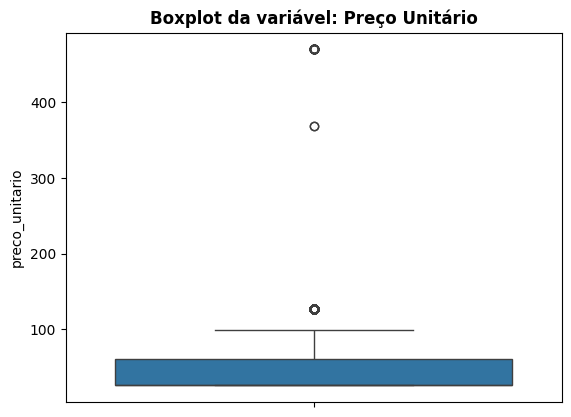

In [16]:
sns.boxplot(
    fVendas["preco_unitario"]
)

plt.title("Boxplot da variável: Preço Unitário", fontdict={"weight":"bold"})

plt.show()

### Variável desconto (fVendas)

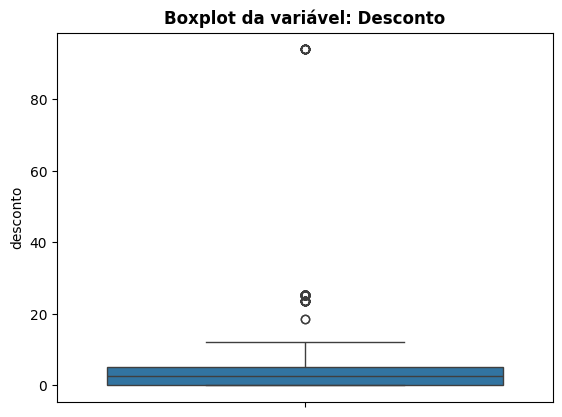

In [17]:
sns.boxplot(
    fVendas["desconto"]
)

plt.title("Boxplot da variável: Desconto", fontdict={"weight":"bold"})

plt.show()

### Variável: faturamento (fVendas)

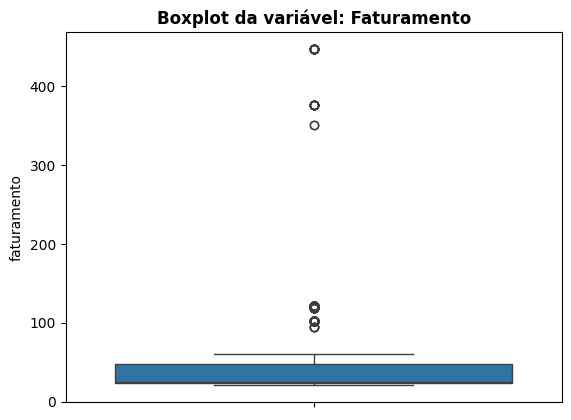

In [18]:
sns.boxplot(
    fVendas["faturamento"]
)

plt.title("Boxplot da variável: Faturamento", fontdict={"weight":"bold"})

plt.show()

# dCliente

### Feature engineering (dCliente)

Variável Idade

In [19]:
from datetime import datetime

In [20]:
hoje = datetime.now()

In [21]:
dclientes["data_nascimento"] = dclientes["data_nascimento"].astype("datetime64[ns]")

In [22]:
dclientes["idade"] = np.floor((hoje - dclientes["data_nascimento"]).dt.days / 365)

Variável: Faixa Etária

In [23]:
bins = [42, 47, 52, 57, 62, 67, 72, 77, 82, 87, 92, 97, 102, 107, 112, 118]
labels = [
    "43-47",
    "48-52",
    "53-57",
    "58-62",
    "63-67",
    "68-72",
    "73-77",
    "78-82",
    "83-87",
    "88-92",
    "93-97",
    "98-102",
    "103-107",
    "108-112",
    "113-117"
]

In [24]:
dclientes["faixa_etaria"] = pd.cut(
    dclientes["idade"],
    bins=bins,
    labels=labels,
    right=True
)

### Verificando valores nulos (dCliente)

In [25]:
dclientes.isna().sum()

id_cliente         0
nome_cliente       0
data_nascimento    0
estado_civil       0
sexo               0
escolaridade       0
profissao          0
idade              0
faixa_etaria       0
dtype: int64

### Verificando valores duplicados (dCliente)

In [26]:
dclientes.duplicated().sum()

0

### Verificando tipos de dados (dCliente)

In [27]:
dclientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_cliente       18484 non-null  int64         
 1   nome_cliente     18484 non-null  object        
 2   data_nascimento  18484 non-null  datetime64[ns]
 3   estado_civil     18484 non-null  object        
 4   sexo             18484 non-null  object        
 5   escolaridade     18484 non-null  object        
 6   profissao        18484 non-null  object        
 7   idade            18484 non-null  float64       
 8   faixa_etaria     18484 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 1.1+ MB


### Medidas resumo de variáveis quantitativas (dCliente)

In [28]:
resumo_clientes = dclientes.loc[:, ["id_cliente", "idade"]]

In [29]:
resumo_clientes.describe()

,id_cliente,idade
count,18484.000000,18484.000000
mean,9242.500000,61.807780
std,5336.015523,11.269041
min,1.000000,43.000000
25%,4621.750000,53.000000
50%,9242.500000,60.000000
75%,13863.250000,69.000000
max,18484.000000,113.000000


# Análise Univarida - Variáveis Numéricas (dCliente)

## Variável: Idade

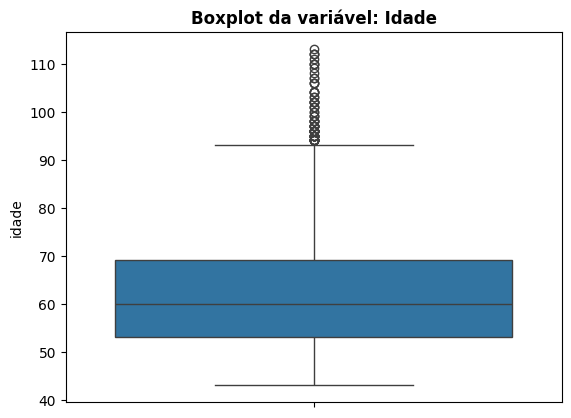

In [30]:
sns.boxplot(
    dclientes["idade"]
)

plt.title("Boxplot da variável: Idade", fontdict={"weight":"bold"})

plt.show()

# Análise Univarida - Variáveis Categóricas (dCliente)

## Variável: Estado civil

Visualização de dados

In [31]:
dclientes["estado_civil"].value_counts()

estado_civil
M    10011
S     8473
Name: count, dtype: int64

In [32]:
married = dclientes["estado_civil"].value_counts()[0]
single = dclientes["estado_civil"].value_counts()[1]

C:\Users\55839\AppData\Local\Temp\ipykernel_15460\1529931675.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  married = dclientes["estado_civil"].value_counts()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_15460\1529931675.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  single = dclientes["estado_civil"].value_counts()[1]


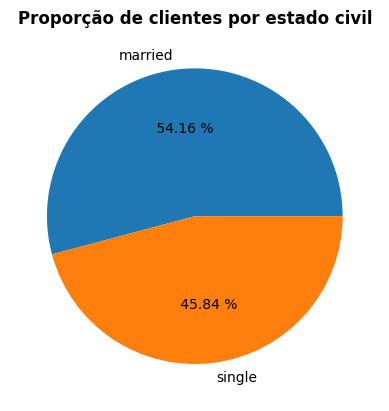

In [33]:
plt.pie(
    [married, single],
    labels = ["married", "single"],
    autopct= "% .2f %%"
)

plt.title("Proporção de clientes por estado civil", fontdict={"weight":"bold"})

plt.show()

## Variável: Sexo

Visualização de dados

In [34]:
dclientes["sexo"].value_counts()

sexo
M    9351
F    9133
Name: count, dtype: int64

In [35]:
male = dclientes["sexo"].value_counts()[0]
female = dclientes["sexo"].value_counts()[1]

C:\Users\55839\AppData\Local\Temp\ipykernel_15460\3632692589.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male = dclientes["sexo"].value_counts()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_15460\3632692589.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female = dclientes["sexo"].value_counts()[1]


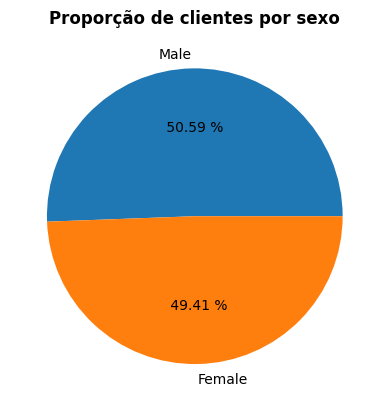

In [36]:
plt.pie(
    [male, female],
    labels = ["Male", "Female"],
    autopct = "% .2f %%"
)

plt.title("Proporção de clientes por sexo", fontdict={"weight":"bold"})

plt.show()

## Variável: escolaridade

Tabela de frequência

In [37]:
ordem = ["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"]

In [38]:
dclientes["escolaridade"] = dclientes["escolaridade"].astype("category")

In [39]:
dclientes["escolaridade"] = dclientes["escolaridade"].cat.reorder_categories(ordem, ordered=True)

In [40]:
escolaridade = dclientes["escolaridade"].value_counts().sort_index().to_frame("freq_absoluta")

In [41]:
escolaridade["freq_relativa"] = dclientes["escolaridade"].value_counts(1).sort_index()

In [42]:
escolaridade["freq_acumulada"] = escolaridade["freq_relativa"].cumsum()

In [43]:
escolaridade

,freq_absoluta,freq_relativa,freq_acumulada
escolaridade,,,
Partial High School,1581,0.085533,0.085533
High School,3294,0.178208,0.263742
Partial College,5064,0.273967,0.537708
Bachelors,5356,0.289764,0.827472
Graduate Degree,3189,0.172528,1.000000


Visualização de dados

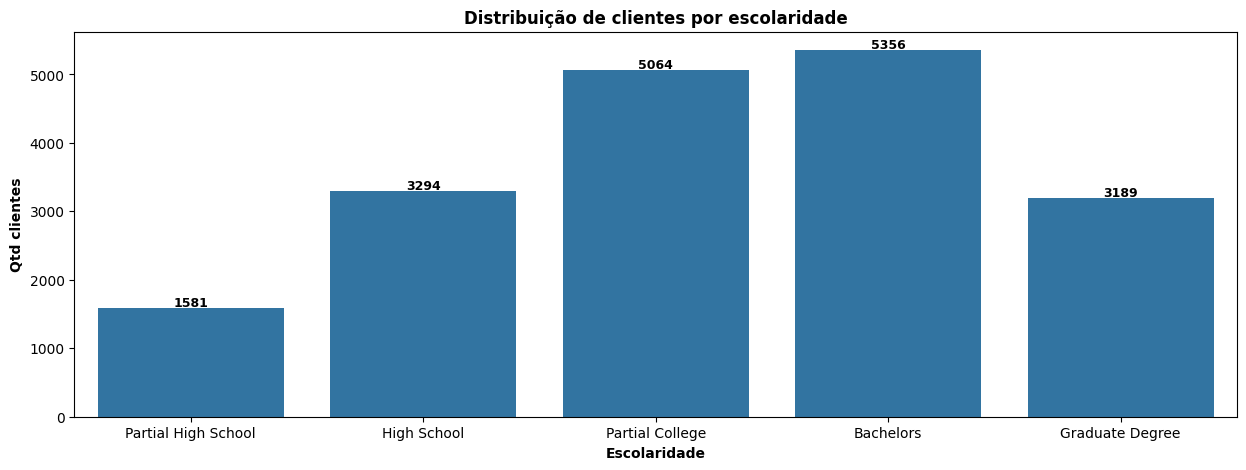

In [44]:
plt.figure(figsize=(15,5))

sns.barplot(
    escolaridade,
    x=escolaridade.index,
    y="freq_absoluta"
)

plt.title("Distribuição de clientes por escolaridade", fontdict={"weight":"bold"})
plt.ylabel("Qtd clientes", fontdict={"weight":"bold"})
plt.xlabel("Escolaridade", fontdict={"weight":"bold"})

for index, data in enumerate(escolaridade["freq_absoluta"]):
    plt.text(index, data+30, str(data), ha="center", weight="bold", size=9)

plt.show()

## Variável: profissão

Tabela de frequência

In [45]:
profissao = dclientes["profissao"].value_counts().to_frame("freq_absoluta")

In [46]:
profissao["freq_relativa"] = dclientes["profissao"].value_counts(1)

In [47]:
profissao["freq_acumulada"]  = profissao["freq_relativa"].cumsum()

In [48]:
profissao

,freq_absoluta,freq_relativa,freq_acumulada
profissao,,,
Professional,5520,0.298637,0.298637
Skilled Manual,4577,0.247620,0.546256
Management,3075,0.166360,0.712616
Clerical,2928,0.158407,0.871024
Manual,2384,0.128976,1.000000


Visualização de dados

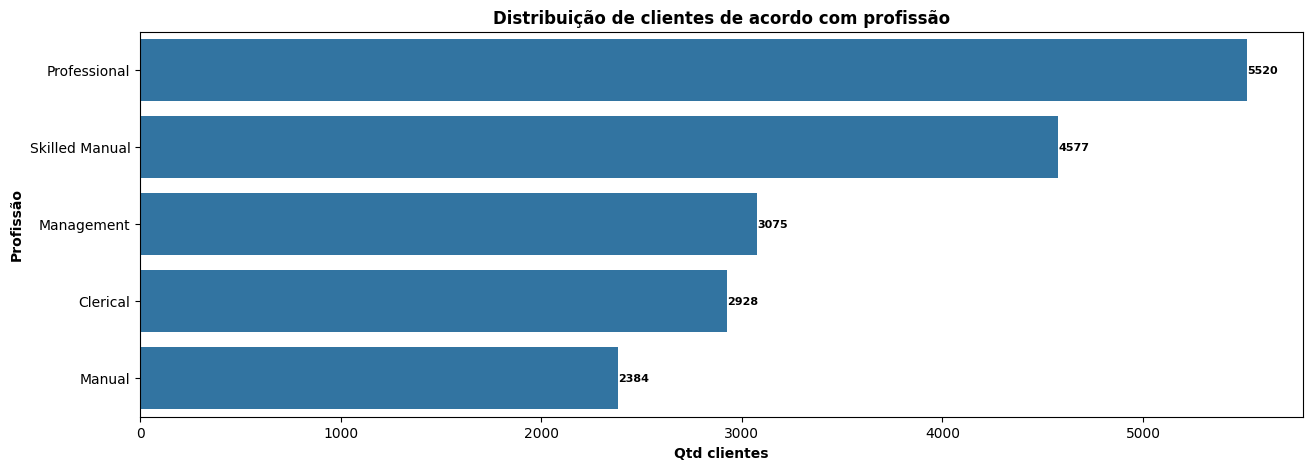

In [49]:
plt.figure(figsize=(15,5))

sns.barplot(
    profissao,
    y=profissao.index,
    x="freq_absoluta",
    orient="h"
)

plt.title("Distribuição de clientes de acordo com profissão", fontdict={"weight":"bold"})
plt.ylabel("Profissão",fontdict={"weight":"bold"})
plt.xlabel("Qtd clientes", fontdict={"weight":"bold"})

for index, data in enumerate(profissao["freq_absoluta"]):
    plt.text(data, index, str(data), ha="left", va="center", size=8, weight="bold")

plt.show()

## Variável: Faixa Etária

Tabela de frequência

In [50]:
faixa_etaria = dclientes["faixa_etaria"].value_counts().sort_index().to_frame("freq_absoluta")

In [51]:
faixa_etaria["freq_relativa"] = dclientes["faixa_etaria"].value_counts(1).sort_index()

In [52]:
faixa_etaria["freq_acumulada"] = faixa_etaria["freq_relativa"].cumsum()

In [53]:
faixa_etaria

,freq_absoluta,freq_relativa,freq_acumulada
faixa_etaria,,,
43-47,1616,0.087427,0.087427
48-52,2623,0.141907,0.229333
53-57,3217,0.174042,0.403376
58-62,3123,0.168957,0.572333
63-67,2524,0.136551,0.708883
68-72,1977,0.106957,0.815841
73-77,1486,0.080394,0.896235
78-82,1011,0.054696,0.950931
83-87,573,0.031000,0.981930


Visualização de dados

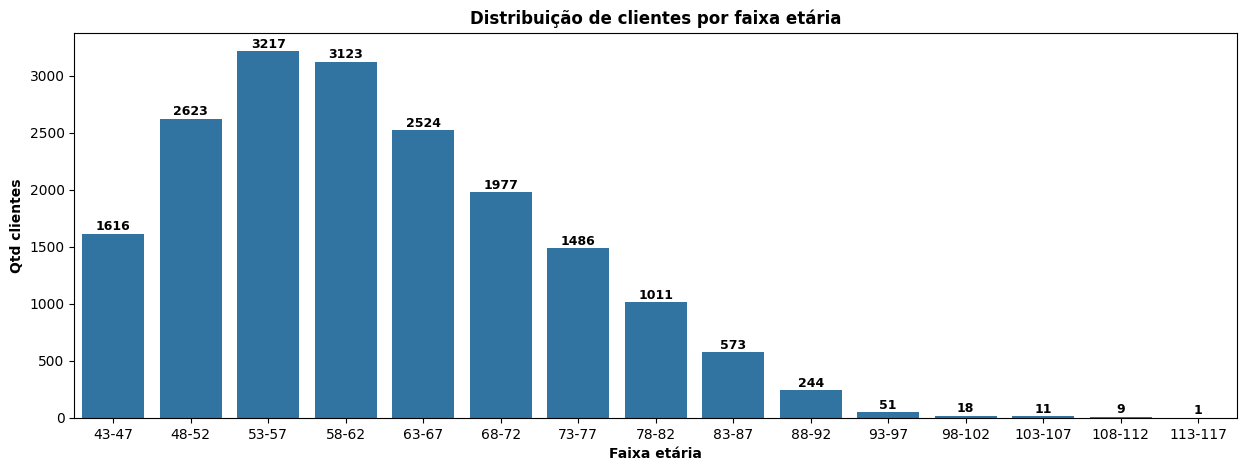

In [54]:
plt.figure(figsize=(15,5))

sns.barplot(
    faixa_etaria,
    x=faixa_etaria.index,
    y="freq_absoluta"
)

plt.title("Distribuição de clientes por faixa etária", fontdict={"weight":"bold"})
plt.xlabel("Faixa etária", fontdict={"weight":"bold"})
plt.ylabel("Qtd clientes", fontdict={"weight":"bold"})

for index, data in enumerate(faixa_etaria["freq_absoluta"]):
    plt.text(index, data+30, str(data), ha="center", weight="bold", size=9)

plt.show()